# Pandas Analysis of Netflix Shows and Movies

## 1. Actor and actress appearances in shows and movies

In [22]:
import pandas as pd # pip install pandas # if not owned

import matplotlib.pyplot as plt

from pathlib import Path

# import os

# change the paths below

USER_PATH = Path(r"C:\Users\Mateusz\Desktop\ZBIORCZE\TECH\ANALIZA DANYCH\Python\Projekty MB") # <--- here

df = pd.read_csv(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "data" / "data_after_cleaning" / "data_cleaned.csv") 

df_cast = pd.read_csv(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "data" / "data_after_cleaning" / "cast.csv") 

df_category = pd.read_csv(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "data" / "data_after_cleaning" / "category.csv") 

df_country = pd.read_csv(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "data" / "data_after_cleaning" / "country.csv") 

In [23]:
# merging two tables

a1 = df_cast.merge(df_cast, how = "inner")

a1 = a1.merge(df[["show_id", "type"]], how = "inner")

In [24]:
# creating pivot table - counting actor and actress appearances in shows and movies

pt_a1 = pd.pivot_table(
    a1,
    values="show_id",
    index="cast",
    columns="type",
    aggfunc="count"
)

#pt_a1 = pt_a1.reset_index()

#pt_a1[pt_a1["cast"] != "Unknown"]

In [25]:
# getting rid of null values and sorting dataframe

pt_a1 = pt_a1[pt_a1[["Movie", "Show"]].notna().all(axis=1)]

pt_a1["Sum"] = pt_a1["Movie"] + pt_a1["Show"]

pt_a1 = pt_a1.sort_values(by = "Sum", ascending = False)

In [26]:
# float type -> int type for all columns

col = pt_a1.columns

pt_a1[col] = pt_a1[col].astype(int)

pt_a1_top10 = pt_a1.iloc[1:11, :2].iloc[::-1] # 10 rows limit



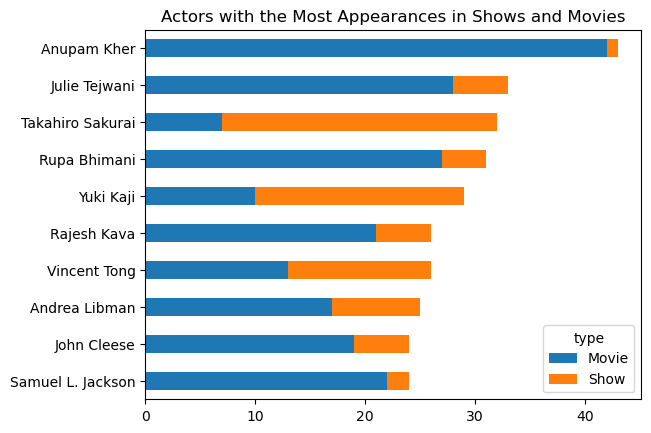

In [27]:
# chart
#pt_a1 = pt_a1.sort_values(by = "Sum", ascending=True)

pt_a1_top10.plot(kind = "barh", title = "Actors with the Most Appearances in Shows and Movies", stacked = True, ylabel = "")

plt.savefig(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "images" / "chart1.png", dpi=300, bbox_inches='tight')

plt.show()

In [28]:
#saving results

pt_a1_top10.to_csv(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "data" / "results" / "actors_appearances.csv", index = True) 